# `geom_hex()`

In [1]:
from math import sqrt

import numpy as np
import pandas as pd

from lets_plot import *


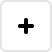
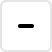
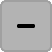
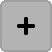
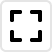
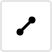
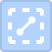
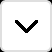
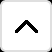
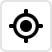
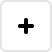
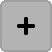
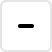
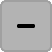
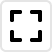
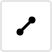
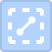
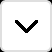
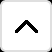
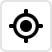

In [2]:
LetsPlot.setup_html()

In [3]:
height_coeff = sqrt(3) / 2

In [4]:
data = {
    'x': [-10, -10, 10, 9, 11],
    'y': [v * height_coeff for v in [-10, 10, -10, 9, 11]],
    'w': [2, 4, 8, 1, 1],
}

In [5]:
identity_data = {
    'x': [-.5, .5, 0],
    'y': [0, 0, height_coeff],
    'g': [1, 1, 2],
    'h': [1] * 3,
}

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Basic example with default stat

In [7]:
ggplot(df, aes("cty", "hwy")) + geom_hex()

## Basic example with `'identity'` stat

In [8]:
ggplot(identity_data, aes('x', 'y', fill='g')) + geom_hex(aes(height='h'), stat='identity')

## Aesthetics

In [9]:
gggrid([
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20]) + geom_point(color='red') + ggtitle("Default"),
    ggplot(data, aes('x', 'y')) + geom_hex(width=.5, binwidth=[20, 20]) + geom_point(color='red') + ggtitle("width=.5"),
    ggplot(data, aes('x', 'y')) + geom_hex(height=.5, binwidth=[20, 20]) + geom_point(color='red') + ggtitle("height=.5"),
    ggplot(data, aes('x', 'y')) + geom_hex(aes(weight='w'), binwidth=[20, 20]) + geom_text(aes(label='w'), color='red') + ggtitle("weight='w'"),
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20], alpha=.25) + geom_point(color='red') + ggtitle("alpha=.25"),
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20], size=1, color='red', linetype='longdash') + geom_point(color='red') + ggtitle("size=2, color='red', linetype='longdash'"),
    ggplot(data, aes('x', 'y')) + geom_hex(aes(fill='..density..'), binwidth=[20, 20]) + geom_point(color='red') + ggtitle("fill='..density..'"),
], ncol=2)

## Parameters

### `bins`/`binwidth`

In [10]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + geom_hex(),
    ggplot(df, aes("cty", "hwy")) + geom_hex(bins=[6, 7]),
    ggplot(df, aes("cty", "hwy")) + geom_hex(binwidth=[5, 5]),
])

### `drop`

In [11]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + geom_hex(),
    ggplot(df, aes("cty", "hwy")) + geom_hex(drop=False),
])

### `tooltips`

In [12]:
ggplot(df, aes("cty", "hwy")) + \
    geom_hex(tooltips=layer_tooltips().title("(^x, ^y)")\
                                      .line("count|@..count..")\
                                      .line("density|@..density..").format("@..density..", ".3~f"))

### `position`

In [13]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + geom_hex(binwidth=[4, 4]),
    ggplot(df, aes("cty", "hwy")) + geom_hex(binwidth=[4, 4], position=position_nudge(x=2, y=2)),
])

### `orientation`

In [14]:
gggrid([
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20]) + geom_point(color='red'),
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20], orientation='y') + geom_point(color='red'),
])

### `inherit_aes`

In [15]:
gggrid([
    ggplot(identity_data, aes(color='g')) + \
        geom_hex(aes('x', 'y', fill='g', height='h'), stat='identity', size=2, alpha=.3),
    ggplot(identity_data, aes(color='g')) + \
        geom_hex(aes('x', 'y', fill='g', height='h'), stat='identity', size=2, alpha=.3, inherit_aes=False),
])

### `manual_key`

In [16]:
ggplot(df, aes("cty", "hwy")) + geom_hex(manual_key="Manual key")

### `sampling`

In [17]:
# At least it works as well as it does for `geom_bin2d()`

def sampling_plot(sampling):
    return ggplot(df, aes("cty", "hwy")) + \
        geom_hex(sampling=sampling) + \
        ggtitle(str(sampling).replace("\n", " "))

gggrid([
    sampling_plot(sampling_pick(5)),
    sampling_plot(sampling_random(5, seed=42)),
    sampling_plot(sampling_systematic(5)),
], ncol=2)

### `color_by`/`fill_by`

In [18]:
ggplot(df, aes("cty", "hwy")) + \
    geom_hex(aes(paint_a="..count..", paint_b="..count.."),
             binwidth=[3, 3], size=1, color_by='paint_a', fill_by='paint_b') + \
    scale_gradient('paint_a', low="black", high="red", guide=guide_colorbar(title="count (border)")) + \
    scale_gradient('paint_b', low="black", high="yellow", guide=guide_colorbar(title="count (figure)"))

## Change geometry

In [19]:
ggplot(df, aes("cty", "hwy")) + \
    geom_point(aes(color='..count..'), stat='binhex', binwidth=[3, 3],
               shape=17, size=3, size_unit='x') + \
    coord_fixed()

## With other layers

In [20]:
ggplot(df, aes("cty", "hwy")) + \
    geom_hex(binwidth=[5, 5], color="white", size=.5) + \
    geom_point(color="white", size=1.5) + \
    ggmarginal('tr', layer=geom_histogram(binwidth=5, color="lightgray", fill="white")) + \
    facet_grid(x="year") + \
    scale_x_continuous(breaks=list(range(0, 40, 5))) + \
    scale_y_continuous(breaks=list(range(0, 50, 5))) + \
    xlim(0, 40) + ylim(0, 50) + \
    theme_minimal() + \
    flavor_darcula()

In [33]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + \
        geom_hex(binwidth=[5, 5]) + \
        ggtitle("Default coord"),
    ggplot(df, aes("cty", "hwy")) + \
        geom_hex(binwidth=[5, 5]) + \
        coord_flip() + \
        ggtitle("coord_flip()"),
    ggplot(df, aes("cty", "hwy")) + \
        geom_hex(binwidth=[5, 5]) + \
        coord_polar() + \
        ggtitle("coord_polar()"),
], ncol=1) + ggsize(600, 1200)

## Tests

In [22]:
def get_grid_data(n, m):
    return {
        'x': [i for i in range(n) for j in range(m)],
        'y': [j * height_coeff for i in range(n) for j in range(m)],
    }

def get_grid_plot(n, m, w, h):
    return ggplot(get_grid_data(n, m), aes('x', 'y')) + \
        geom_hex(binwidth=[w, h]) + \
        geom_point(color="red") + \
        ggtitle("binwidth=[{0}, {1}]".format(w, h))

gggrid([
    get_grid_plot(2, 2, 1, 1),
    get_grid_plot(2, 2, 2, 2),
    get_grid_plot(4, 4, 2, 2),
    get_grid_plot(4, 4, 1, 4),
    get_grid_plot(4, 4, 4, 1),
], ncol=2)

In [23]:
tests = [
    {
        'title': "Empty data",
        'data': {
            'x': [],
            'y': [],
        }
    },
    {
        'title': "One element",
        'data': {
            'x': [0],
            'y': [0],
        }
    },
    {
        'title': "NaN's in data",
        'data': {
            'x': [0, 1, np.nan, None, 1, 1],
            'y': [0, 1, 1, 1, np.nan, None],
        }
    },
    {
        'title': "Empty data, identity stat",
        'data': {
            'x': [],
            'y': [],
        },
        'stat': 'identity'
    },
    {
        'title': "One element, identity stat",
        'data': {
            'x': [0],
            'y': [0],
        },
        'stat': 'identity'
    },
    {
        'title': "NaN's in data, identity stat",
        'data': {
            'x': [0, 1, np.nan, None, 1, 1],
            'y': [0, 1, 1, 1, np.nan, None],
        },
        'stat': 'identity'
    },
]

gggrid([
    ggplot(t['data'], aes('x', 'y')) + \
        geom_hex(stat=t['stat'] if 'stat' in t else None) + \
        ggtitle(t['title'])
    for t in tests
], ncol=2)

In [24]:
def get_test_plot(x, y):
    h = 2 * height_coeff
    test_df = pd.DataFrame({
        'x': [-2, 0, -3, -1, 1, -2, 0] + [x],
        'y': [-h, -h, 0, 0, 0, h, h] + [y],
        'g': ["center"] * 7 + ["border"]
    })
    return ggplot() + \
        geom_hex(aes('x', 'y'), data=test_df, binwidth=[2, 2], size=.5, color="black") + \
        geom_point(aes('x', 'y'), data=test_df[test_df["g"] == "border"], size=5, shape=21, fill="red") + \
        scale_fill_gradient(low="blue", high="yellow", guide='none') + \
        coord_fixed(ratio=1) + \
        theme_void()

hh = 1 / height_coeff
gggrid([
    get_test_plot(0, hh),
    get_test_plot(0.5, 3 * hh / 4),
    get_test_plot(1, hh / 2),
    get_test_plot(1, 0),
    get_test_plot(1, -hh / 2),
    get_test_plot(0.5, -3 * hh / 4),
    get_test_plot(0, -hh),
    get_test_plot(-0.5, -3 * hh / 4),
    get_test_plot(-1, -hh / 2),
    get_test_plot(-1, 0),
    get_test_plot(-1, hh / 2),
    get_test_plot(-0.5, 3 * hh / 4),
], ncol=4) + ggsize(600, 450)

In [25]:
# There's just enough here that there are no falls
def get_test_plot(df, xcol, ycol, bin_info, df_name, data_limit=100):
    df = df.sort_values(by=[ycol, xcol]).iloc[:data_limit]
    xrange = df[xcol].max() - df[xcol].min()
    yrange = df[ycol].max() - df[ycol].min()
    if yrange == 0:
        return None
    if bin_info["type"] == "bins":
        params = {"bins": bin_info["value"]}
        title = "{name}\nbins={bin}".format(name=df_name, bin=bin_info["value"])
    else:
        bin_w, bin_h = bin_info["value"]
        binwidth = [bin_w * xrange, bin_h * yrange]
        params = {"binwidth": binwidth}
        title = "{name}\nbinwidth={bin}".format(name=df_name, bin="[{0:.2g}, {1:.2g}]".format(binwidth[0], binwidth[1]))
    return ggplot(df, aes(xcol, ycol)) + \
        geom_hex(show_legend=False, **params) + \
        geom_point(color="red") + \
        coord_fixed(ratio=xrange/yrange) + \
        ggtitle(title)

def get_test_plots(data_test, bin_test):
    url = data_test["url"]
    cols = data_test["cols"]
    df_name = url.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(url, encoding='utf-8', encoding_errors='ignore', on_bad_lines='skip')
    return [p for p in [
        get_test_plot(
            df,
            cols[i],
            cols[i+1],
            bin_test,
            df_name
        )
        for i in range(len(cols) - 1)
    ] if p is not None]

data_tests = [
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/ToothGrowth.csv",
        "cols": ["len", "dose"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/US_household_income_2017.csv",
        "cols": ["ALand", "AWater", "Lat", "Lon", "Mean", "Median", "Stdev", "sum_w"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/airquality.csv",
        "cols": ["Ozone", "Solar.R", "Wind", "Temp"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/chemical_elements.csv",
        "cols": ["Atomic Weight", "Ionic Radius", "Atomic Radius", "Electronegativity", "First Ionization Potential", "Density", "Melting Point (K)", "Boiling Point (K)", "Specific Heat Capacity"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/diamonds.csv",
        "cols": ["carat", "depth", "price"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/economics.csv",
        "cols": ["pce", "pop", "psavert", "uempmed", "unemploy"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/iris.csv",
        "cols": ["sepal_length", "sepal_width", "petal_length", "petal_width"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/midwest.csv",
        "cols": ["area", "poptotal", "popdensity", "inmetro"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv",
        "cols": ["displ", "cyl", "cty", "hwy"],
    },
    {
        "url": "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/penguins.csv",
        "cols": ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
    },
]

bin_tests = [
    {"type": "bins", "value": [1, 1]},
    {"type": "bins", "value": [1, 2]},
    {"type": "bins", "value": [2, 1]},
    {"type": "bins", "value": [2, 2]},
    {"type": "bins", "value": [5, 5]},
    {"type": "binwidth", "value": [1, 1]},
    {"type": "binwidth", "value": [.99, .99]},
    {"type": "binwidth", "value": [1.01, 1.01]},
    {"type": "binwidth", "value": [.2, .2]},
]

gggrid([
    p
    for data_test in data_tests
    for bin_test in bin_tests
    for p in get_test_plots(data_test, bin_test)
], ncol=3)

## Problems

### Wrong computations

In [26]:
# Fixed
test_data1 = {
    'x': [0, 0, 1, 1],
    'y': [0, 1, 0, 1],
}

ggplot(test_data1, aes('x', 'y')) + \
    geom_hex(binwidth=[1, 2]) + \
    geom_point(color="red")

In [27]:
# Fixed
def get_test2_plot(xcoeff, ycoeff):
    test_data2 = {
        'x': [-xcoeff, xcoeff, 0],
        'y': [-6*ycoeff/height_coeff, 0, ycoeff/height_coeff],
    }
    return ggplot(test_data2, aes('x', 'y')) + \
        geom_hex(binwidth=[xcoeff, 2*ycoeff]) + \
        geom_point(color="red") + \
        coord_cartesian() + \
        ggtitle("x stretch: {0:.2g}\ny stretch: {1:.2g}".format(xcoeff, ycoeff))

gggrid([
    get_test2_plot(1, 1),
    get_test2_plot(1e-15, 1e-15),
    get_test2_plot(1e-15, 1e15),
    get_test2_plot(1e15, 1e-15),
    get_test2_plot(1e15, 1e15),
], ncol=2)

In [28]:
# Fixed
test_data3 = {
    'x': [-10, -10, 10, 9, 11],
    'y': [v * height_coeff for v in [-10, 10, -10, 9, 11]],
}

def get_test3_plot(bins):
    return ggplot(test_data3, aes('x', 'y')) + \
        geom_hex(bins=bins, drop=False) + \
        geom_point(color="red") + \
        ggtitle("bins={0}".format(bins))

gggrid([
    get_test3_plot([1, 1]),
    get_test3_plot([1, 2]),
    get_test3_plot([2, 1]),
    get_test3_plot([2, 2]),
    get_test3_plot([1, 3]),
    get_test3_plot([2, 3]),
    get_test3_plot([3, 1]),
    get_test3_plot([3, 2]),
    get_test3_plot([3, 3]),
], ncol=3)

### Too much stretching of the hexagons

In [29]:
# Fixed when units is 'identity'
test_data = {
    'x': [-10, -10, 10, 9, 11],
    'y': [v * height_coeff for v in [-10, 10, -10, 9, 11]],
}

ggplot(test_data, aes('x', 'y')) + \
    geom_hex(binwidth=[10, 10]) + \
    geom_point(color='red')